<a href="https://colab.research.google.com/github/willstauffernorris/DS-Unit-1-Sprint-2-Statistics/blob/master/DS-Unit-1-Sprint-2-Statistics/DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [55]:
# TODO
import pandas as pd

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data")

df.head()


,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [56]:
df.shape

## the UCI website lists the # of instances as 690 and number of attributes as 15.
## The .shape function typically reads as one more than the attributes (16) which seems correct, 
## but there is one instance too few. This is because I didn't read in a header. 

(689, 16)

In [57]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",
                 header = None,
                 names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])
print(df.shape)
df.head(10)

##now this looks like what the UCI documentation describes

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [58]:
###Checking for missing data

df.isnull().sum()

##This says there, are no null values, but the documentation says otherwise.

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [59]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",
                 header = None,
                 na_values="NaN",
                 names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])
print(df.shape)
df.head(10)

df.isnull().sum()

##Now I tried changing the n/a values on import, but this function looks like it's doing the same thing as the .isnull() call

(690, 16)


A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [60]:
df.head(600)
#looks like there are some "?" in there. Changing those "?" to "NaN"
import numpy as np

df = df.replace({'?':np.NaN})

df.head(600)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,b,25.75,0.750,u,g,c,bb,0.250,t,f,0,f,g,00349,23,+
596,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,00396,4159,+
597,a,21.50,6.000,u,g,aa,v,2.500,t,t,3,f,g,00080,918,+
598,NaN,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,00240,768,+


In [61]:
df.isnull().sum()
###This now matches the documentation for missing values.
## A1:  12
   # A2:  12
   # A4:   6
   # A5:   6
   # A6:   9
   # A7:   9
   # A14: 13

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [62]:
### now checking to make sure that the data type in each column matches the documentation

df.dtypes

#need to be fixed: A2 object to float
#A11: int to float
##A14: object to float
#A 15: int to float

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [0]:
###Stretch Goals Part 1
##Make sure that all of your dataframe columns have the appropriate data types.


In [63]:
pd.to_numeric(df['A2'])


0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: A2, Length: 690, dtype: float64

In [0]:
df['A2'] = pd.to_numeric(df['A2'])
##attribute changed to float, saving it to the dataframe

In [65]:
pd.to_numeric(df['A11'], downcast='float')


0      1.0
1      6.0
2      0.0
3      5.0
4      0.0
      ... 
685    0.0
686    2.0
687    1.0
688    0.0
689    0.0
Name: A11, Length: 690, dtype: float32

In [0]:
df['A11'] = pd.to_numeric(df['A11'], downcast='float')
##attribute changed to float (it's float 32 instead of 64.. we'll see if that works)
##saving to dataframe

In [67]:
pd.to_numeric(df['A14'])
##attribute changed to float 

0      202.0
1       43.0
2      280.0
3      100.0
4      120.0
       ...  
685    260.0
686    200.0
687    200.0
688    280.0
689      0.0
Name: A14, Length: 690, dtype: float64

In [0]:
df['A14']=pd.to_numeric(df['A14'])
##saving to dataframe

In [69]:
pd.to_numeric(df['A15'], downcast ='float')
##attribute changed to float (it's float 32 instead of 64.. we'll see if that works)

0        0.0
1      560.0
2      824.0
3        3.0
4        0.0
       ...  
685      0.0
686    394.0
687      1.0
688    750.0
689      0.0
Name: A15, Length: 690, dtype: float32

In [0]:
df['A15'] = pd.to_numeric(df['A15'], downcast ='float')

In [71]:
df.dtypes

### now this matches the documentation!!

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float32
A12     object
A13     object
A14    float64
A15    float32
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [72]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [73]:
# TODO

##exploring the data

df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.000000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.400000,184.014771,1017.385498
std,11.957862,4.978163,3.346513,4.862927,173.806768,5210.080566
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.000000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.000000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


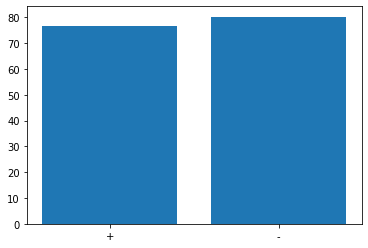

In [74]:


import matplotlib.pyplot as plt

ax = plt.bar(df['A16'], df['A2'])
##approved vs disapprvoed by A2

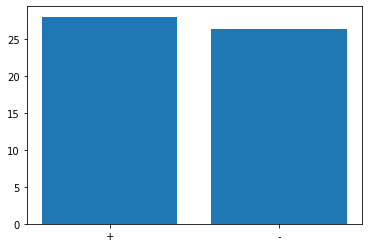

In [75]:
ax = plt.bar(df['A16'], df['A3'])

### approved vs disapproved by A3

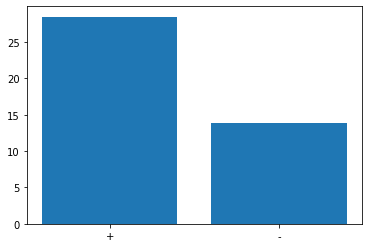

In [76]:
ax = plt.bar(df['A16'], df['A8'])


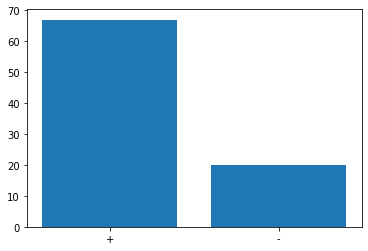

In [77]:
ax = plt.bar(df['A16'], df['A11'])


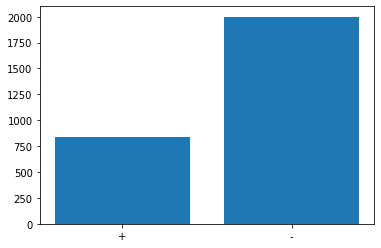

In [78]:
ax = plt.bar(df['A16'], df['A14'])


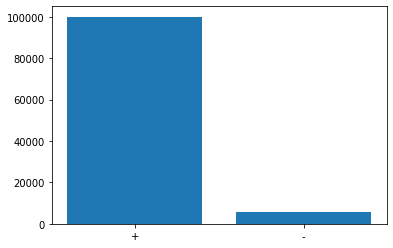

In [79]:
ax = plt.bar(df['A16'], df['A15'])


In [80]:
pd.crosstab(df['A16'], df['A1'])
##checking out approved vs disapproved by some categorical variables

A1,a,b
A16,,
+,98,206
-,112,262


In [81]:
print(pd.crosstab(df['A16'], df['A4']))
print(pd.crosstab(df['A16'], df['A5']))
print(pd.crosstab(df['A16'], df['A6']))

A4   l    u    y
A16             
+    2  256   45
-    0  263  118
A5     g  gg    p
A16              
+    256   2   45
-    263   0  118
A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
+    19  62  29   7  14   7  14  3  14  16  51  2  33  32
-    35  75  12  23  11  46  45  7  37  22  27  1  31   6


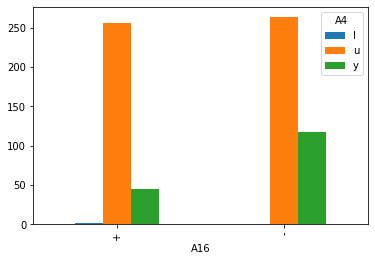

In [82]:
pd.crosstab(df['A16'], df['A4']).plot.bar(stacked=False)

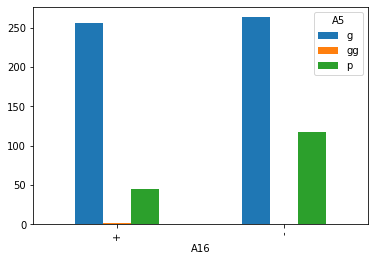

In [83]:
pd.crosstab(df['A16'], df['A5']).plot.bar(stacked=False)

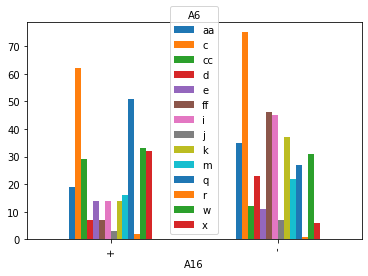

In [84]:
pd.crosstab(df['A16'], df['A6']).plot.bar(stacked=False);

In [0]:
####Now I'm getting set up for the T Test

In [86]:
##first I'm doing to split up the dataframe to run the t test

plus_frame = df[df['A16']=='+']

print("This is the shape of the overall dataframe")
print(df.shape)
print("this is shape of the dataframe split by plus")
print(plus_frame.shape)
plus_frame.head()

This is the shape of the overall dataframe
(690, 16)
this is shape of the dataframe split by plus
(307, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [87]:
minus_frame = df[df['A16']=='-']

print("the shape of the dataframe split by minus")
print(minus_frame.shape)
print("and the shape of the dataframe split by plus")
print(plus_frame.shape)
print("should equal the overall dataframe")
print(df.shape)
print("And they do!!!")

minus_frame.head()

the shape of the dataframe split by minus
(383, 16)
and the shape of the dataframe split by plus
(307, 16)
should equal the overall dataframe
(690, 16)
And they do!!!


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-


In [0]:
###Choose two features to run t-tests (again split by class label)
####select one feature that is extremely different between the classes


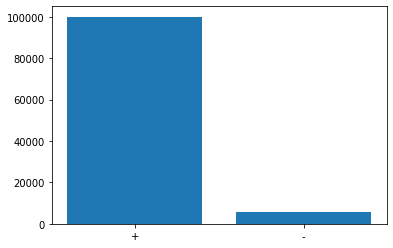

In [88]:
## I'm picking feature A15- it looks very different

ax = plt.bar(df['A16'], df['A15'])

In [89]:
plus_frame.describe()

,A2,A3,A8,A11,A14,A15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859985
std,12.809641,5.471485,4.120792,6.320237,161.770675,7659.766113
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [90]:
minus_frame.describe()

,A2,A3,A8,A11,A14,A15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605743
std,10.919291,4.337662,2.120481,1.900051,181.564835,671.608765
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [0]:
##however, after doing the .describe function, I realize that my bar charts were plotting the max values, not the mean.
##It's more effcient to look for two very different variables by comparing means across continuous variables



In [91]:
from scipy import stats

stats.ttest_ind(plus_frame['A15'], minus_frame['A15'], nan_policy='omit')

#I reject the null hypothesis that they're the same

Ttest_indResult(statistic=4.680216372047322, pvalue=3.4520199670178367e-06)

In [0]:


###another feature that is notably less different (though perhaps still "statistically significantly" different).


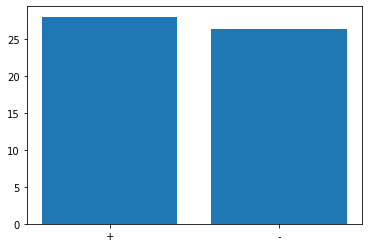

In [92]:
ax = plt.bar(df['A16'], df['A3'])

### the max values of these look more even. let's test if they're different

In [93]:
stats.ttest_ind(plus_frame['A3'], minus_frame['A3'], nan_policy='omit')

##even though these look the same, they're statistically different

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

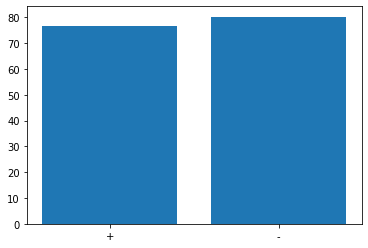

In [94]:
ax = plt.bar(df['A16'], df['A2'])
##we'll try one more that loooks the same

In [95]:
stats.ttest_ind(plus_frame['A2'], minus_frame['A2'], nan_policy='omit')
#again, even though these look close, they're statistically different

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

In [96]:
##OK one more. Looking at the .describe table, A14 might be closer

stats.ttest_ind(plus_frame['A14'], minus_frame['A14'], nan_policy='omit')

##This is the closest one yet, but the two dataframes are statistically significantly different

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [97]:
##For the categorical features, explore by creating "cross tabs" (aka contingency tables) between them and the class label
##apply the Chi-squared test to them

##pandas.crosstab can create contingency tables, and scipy.stats.chi2_contingency can calculate the Chi-squared statistic for them.

##try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent)

A4_contingency=pd.crosstab(df['A16'], df['A4'])

A4_contingency


A4,l,u,y
A16,,,
+,2,256,45
-,0,263,118


In [98]:

chi_squared, p_value, dof, expected = stats.chi2_contingency(A4_contingency)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 

##these are significant (p is about 0), but I'm a little bit suspicious becuase the 'l' category has such little data


Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2


In [99]:
df.head()

##just remembering which attributes are categorical

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [100]:
A9_contingency=pd.crosstab(df['A16'], df['A9'])

A9_contingency

##just looking at this, it looks like there is a significant difference with enough data points

A9,f,t
A16,,
+,23,284
-,306,77


In [101]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(A9_contingency)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

###very significant!!


Chi-Squared: 355.2038167412799
P-value: 3.1185900878457007e-79
Degrees of Freedom: 1


In [0]:

##and one where it is less extreme.

In [103]:

A1_contingency = pd.crosstab(df['A16'], df['A1'])

A1_contingency

A1,a,b
A16,,
+,98,206
-,112,262


In [104]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(A1_contingency)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 

##this one is not signficant

Chi-Squared: 0.31128326491619945
P-value: 0.5768937883001117
Degrees of Freedom: 1


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

#T Tests
I ended up running 4 t-tests.

In the first T test, I visualized the continuous feature in a bar chart, separated by class labels + and -. Just looking at it, the bars were quite different. Sure enough, after running the t-test, I got a p value of ~0. However, I realized that my bar graphs were only displaying the max values of each attribute. After running a .describe call, I found the mean of each attribute, which is what the t-test is testing. 

Ultimately, in all 4 t-tests, there was a significant difference (p<0.05) between the + and - labels for all the attributes I tested.


#Chi squared
I ran 3 t-tests. 

In the first, there was a significant difference between the + and - classifier, but in one of the conditions of the attribute A4, there were only 2 and 0 counts in the 'l' condition. This was balanced by having a lot of data points in the other conditions, so I will say that I reject the null hypothesis that the + and - are the same, due to a p value of almost 0.

Same with the chi squared test of A9, but it was a bit simpler and with an even more certain p value.

In the test of the A1 attribute, I confirmed the null hypothesis that the + and - classifier are the same. This is due to the high p value of .57, meaning that there is only a 43% chance that there is a difference between the + and - classifier- hardly enough to be confident in making that claim.



#Challenges
The most challenging part is the fact that the attributes have no names, just A1, A2, etc. This makes it much harder to wrap my mind around what's going on with the data and makes me unable to apply some domain knowledge. If there were labels, then if I made a mistake I could refere to my knowledge of what's going on- for example, if I got a mean age of 150 or a mean monthly income of $1M then I would know to go back and double check those figures.


# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
## your main work from the stretch goals.

In [106]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.000000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.400000,184.014771,1017.385498
std,11.957862,4.978163,3.346513,4.862927,173.806768,5210.080566
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.000000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.000000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [122]:
##t test function


continuous_headers = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
def t_test_function():
  i=0
  while i < len(continuous_headers):
    header_name = continuous_headers[i]
    print("t-test for")
    print(header_name)
    print(stats.ttest_ind(plus_frame[header_name], minus_frame[header_name], nan_policy='omit'))
    i+=1
  return 


t_test_function()


 ### return stats.ttest_ind(plus_frame['A15'], minus_frame['A15'], nan_policy='omit')

t-test for
A2
Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)
t-test for
A3
Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)
t-test for
A8
Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)
t-test for
A11
Ttest_indResult(statistic=11.66700357808703, pvalue=7.957768870745214e-29)
t-test for
A14
Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)
t-test for
A15
Ttest_indResult(statistic=4.680216372047322, pvalue=3.4520199670178367e-06)


In [0]:
#### didn't quite get this to work in time. 

###made it work later!

Part 3:
Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

In [0]:
data1 = df['A2']

def confidence_interval(data1, confidence=0.5):
 
  data1 = np.array(data1)
  data1 = data1[~np.isnan(data1)] ##remove NaNs
  mean = np.mean(data1)
  n = len(data1)
  stderr = stats.sem(data1)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)

  return (mean, mean - interval, mean + interval)


confidence_interval(data1, confidence=.5)



In [0]:
data1.mean() ##compare simply using the .mean function

In [0]:
data1 = df['A3']

def confidence_interval(data1, confidence=0.5):
 
  data1 = np.array(data1)
  data1 = data1[~np.isnan(data1)] ##remove NaNs
  mean = np.mean(data1)
  n = len(data1)
  stderr = stats.sem(data1)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)

  return (mean, mean - interval, mean + interval)


confidence_interval(data1, confidence=.5)


In [0]:
###ran out of time to visualize!!